In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Importing Essential Packages**

Importing pandas for data manipulation and analysis

Importing numpy for numerical operations and array manipulations

Importing TensorFlow for building and training machine learning models

Importing pyplot module from matplotlib for additional plotting functionalities

Importing os module for interacting with the operating system

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

## **Importing required modules**

preprocessing: Contains functions for preprocessing the input data

model: Defines a GAN + Classifier model

train: Includes unsupervised and supervised training functions

In [3]:
!cp /content/gdrive/MyDrive/SSGAN/Code/preprocessing.py /content/preprocessing.py
!cp /content/gdrive/MyDrive/SSGAN/Code/model.py /content/SSGAN_model.py
!cp /content/gdrive/MyDrive/SSGAN/Code/train.py /content/train.py

import preprocessing
import SSGAN_model
import train

Setting the root directory path

In [4]:
root = 'gdrive/My Drive/SSGAN'

## **Reading Data**

For training purposes, two distinct groups of data are used: Labeled and Unlabeled.

Labeled data comprises two datasets, one focusing on CH mutations and another on tissue mutations.

Unlabeled data is extracted from VCF files.

Each of these files is accompanied by a corresponding .txt file, containing information about 20 upstream and downstream nucleotides.

In [5]:
CH_vcf = pd.read_excel(os.path.join(root,'data/ch_added.xlsx'), header=0)
Tissue_vcf = pd.read_excel(os.path.join(root,'data/labels.xlsx'), sheet_name='Tumor', header=0)

unlabel_vcf  = pd.read_excel(os.path.join(root,'data/unlabel.xlsx'), sheet_name=0, header=0)
unlabel_vcf1 = pd.read_excel(os.path.join(root,'data/unlabel4.xlsx'), sheet_name=0, header=0)
unlabel_vcf2 = pd.read_excel(os.path.join(root,'data/unlabel5.xlsx'), sheet_name=0, header=0)
unlabel_vcf3 = pd.read_excel(os.path.join(root,'data/unlabel6.xlsx'), sheet_name=0, header=0)
unlabel_vcf4 = pd.read_excel(os.path.join(root,'data/unlabel7.xlsx'), sheet_name=0, header=0)

CH_seq = open(os.path.join(root,'data/ch-seq.txt'), 'r').readlines()
tissue_seq = open(os.path.join(root,'data/tissue-seq.txt'), 'r') .readlines()

unlabel_seq  = open(os.path.join(root,'data/unlabel-seq.txt') , 'r').readlines()
unlabel_seq1 = open(os.path.join(root,'data/unlabel4-seq.txt') , 'r').readlines()
unlabel_seq2 = open(os.path.join(root,'data/unlabel5-seq.txt'), 'r').readlines()
unlabel_seq3 = open(os.path.join(root,'data/unlabel6-seq.txt') , 'r').readlines()
unlabel_seq4 = open(os.path.join(root,'data/unlabel7-seq.txt') , 'r').readlines()

## **Preprocessing data**

Renaming columns in the dataframes for consistency


In [6]:
Tissue_vcf = Tissue_vcf.rename(columns= {'CHROM':'Chromosome' , 'POSITION': 'Start_Position' , 'REF':'Ref' , 'ALT' : 'Alt'})
Tissue_vcf['label'] = 'tissue'
CH_vcf = CH_vcf.rename(columns= {'chromosome':'Chromosome' , 'base_pair_location': 'Start_Position' , 'effect_allele':'Ref' , 'other_allele' : 'Alt'})

Applying preprocessing functions to the labeled dataframes

In [7]:
CH = preprocessing.preprocess(CH_vcf , CH_seq)
Tissue = preprocessing.preprocess(Tissue_vcf , tissue_seq)

Streaming output truncated to the last 5000 lines.
/content/preprocessing.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(j)+' position'][index-1] = dic[seq[i][10+j]]
/content/preprocessing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(-1*j)+' position'][index-1] = dic[seq[i][10-j]]
/content/preprocessing.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(j)+' position'][index-1] = dic[seq[i][10+j]]
/

Sampling tissue mutations to achieve a balanced dataset

In [8]:
Tissue = Tissue.sample(12500)
Tissue = Tissue.reset_index(drop=True)
Tissue.tail()

,Chromosome,Start_Position,Alt,Ref,label,1 position,-1 position,2 position,-2 position,3 position,-3 position
12495,16,-0.584651,0,3,0,3,3,1,1,2,0
12496,1,1.002709,2,3,0,3,1,3,1,1,1
12497,12,-0.650019,1,0,0,2,2,0,3,0,3
12498,3,0.657640,0,3,0,1,1,0,1,0,1
12499,2,0.996173,2,3,0,3,1,0,0,2,2


Preprocessing unlabeled data: An additional preprocessing function is required for unlabeled datasets

In [9]:
unlabels1 = preprocessing.initial_process(unlabel_vcf, unlabel_seq)
unlabels2 = preprocessing.initial_process(unlabel_vcf1, unlabel_seq1)
unlabels3 = preprocessing.initial_process(unlabel_vcf2, unlabel_seq2)
unlabels4 = preprocessing.initial_process(unlabel_vcf3, unlabel_seq3)
unlabels5 = preprocessing.initial_process(unlabel_vcf4, unlabel_seq4)

Streaming output truncated to the last 5000 lines.
/content/preprocessing.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(j)+' position'][index-1] = dic[seq[i][10+j]]
/content/preprocessing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(-1*j)+' position'][index-1] = dic[seq[i][10-j]]
/content/preprocessing.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(j)+' position'][index-1] = dic[seq[i][10+j]]
/

Concatenating labeled and unlabeled datasets

Splitting the total DataFrame into test and train sets

In [10]:
unlabels = pd.concat([unlabels1, unlabels2, unlabels3, unlabels4, unlabels5])
total_labels = pd.concat([CH,Tissue]).reset_index(drop = True)
test_labels = total_labels.sample(frac=0.1)
train_labels = total_labels.drop(test_labels.index)
test_labels = test_labels.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)
test_labels.tail(10)

,Chromosome,Start_Position,Alt,Ref,label,1 position,-1 position,2 position,-2 position,3 position,-3 position
2480,20,-0.832263,0,3,1,0,0,3,0,0,0
2481,20,-0.832195,2,0,1,2,0,0,0,1,3
2482,1,-0.832795,2,0,1,0,0,3,1,1,1
2483,5,0.639965,0,3,0,2,1,2,3,1,0
2484,14,-0.242291,0,2,0,1,2,2,0,2,0
2485,3,-0.395493,1,3,0,0,2,0,2,1,2
2486,22,-0.559274,3,2,0,1,2,3,3,1,1
2487,1,0.877570,1,2,0,0,3,0,3,1,1
2488,11,-0.440028,0,3,0,0,3,3,3,3,1
2489,12,-0.831385,1,2,1,2,3,0,1,3,2


Filter out the common data between test and train datasets.

In [11]:
merged = test_labels.merge(train_labels, on=test_labels.columns.to_list(), how='left', indicator=True)
test_labels = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge']).reset_index(drop=True)

test_labels

,Chromosome,Start_Position,Alt,Ref,label,1 position,-1 position,2 position,-2 position,3 position,-3 position
0,3,0.286150,0,3,0,2,1,2,2,2,1
1,18,-0.730497,2,1,0,1,3,3,0,2,3
2,17,-0.832345,2,1,1,2,0,2,1,1,0
3,1,1.133113,2,3,0,0,2,1,0,2,0
4,5,0.500513,0,3,0,3,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2342,14,-0.242291,0,2,0,1,2,2,0,2,0
2343,3,-0.395493,1,3,0,0,2,0,2,1,2
2344,22,-0.559274,3,2,0,1,2,3,3,1,1
2345,11,-0.440028,0,3,0,0,3,3,3,3,1


Data Preparation for Semi-Supervised Learning

In [12]:
y_train = train_labels.pop("label")
y_test = test_labels.pop("label")

X_train = train_labels.to_numpy()
X_test = test_labels.to_numpy()

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

unlabels = pd.concat([train_labels, unlabels])
test_unlabels = unlabels.sample(frac=0.1)
train_unlabels = unlabels.drop(test_unlabels.index)
test_unlabels = test_unlabels.reset_index(drop=True)
train_unlabels = train_unlabels.reset_index(drop=True)

X_train_unsup = train_unlabels.to_numpy()
X_test_unsup = test_unlabels.to_numpy()

X_train_unsup = np.asarray(X_train_unsup).astype('float32')
X_test_unsup = np.asarray(X_test_unsup).astype('float32')

## **Training**

Model Configuration for Semi-Supervised GAN

-Defining discriminator, generator, and classifier models

In [13]:
num_steps = 1000
latent_dim = 50
batch_size = 2000
disc = SSGAN_model.define_disc((X_train[0].shape[0],1))
disc_sup = SSGAN_model.define_supdisc(disc)
disc_unsup = SSGAN_model.define_unsupdisc(disc)

gen_model = SSGAN_model.define_gen(latent_dim,10)
gan_model = SSGAN_model.define_gan(gen_model, disc_unsup)

Training Discriminator and Generator (GAN)

In [14]:
loss_unsup_test = train.train_unsupervised(disc_unsup, gan_model, gen_model, SSGAN_model.generate_fake_samples, SSGAN_model.generate_latent_points,
                                    SSGAN_model.generate_unlabeled_samples, X_train_unsup, X_test_unsup, latent_dim, num_steps, batch_size)

Streaming output truncated to the last 5000 lines.
453/453 [==============================] - 1s 2ms/step
test-unsupervise>81, d[0.695,0.695], g[0.692]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>91, d[0.696,0.687], g[0.700]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>101, d[0.693,0.692], g[0.695]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>111, d[0.695,0.692], g[0.695]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>121, d[0.692,0.694], g[0.692]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>131, d[0.693,0.693], g[0.693]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>141, d[0.694,0.692], g[0.694]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>151, d[0.694,0.692], g[0.694]
453/453 [==============================] - 1s 2ms/step
test-unsupervise>161, d[0.694,0.692], g[0.694]
453/453 [========================

Training Classifier

In [19]:
acc_sup_test = train.train_supervised(disc_sup, SSGAN_model.generate_labeled_samples,
                                      X_train, y_train, X_test, y_test, latent_dim, num_steps, batch_size)

test-supervise>1, c[0.251,95]
test-supervise>11, c[0.255,95]
test-supervise>21, c[0.256,94]
test-supervise>31, c[0.278,94]
test-supervise>41, c[0.252,95]
test-supervise>51, c[0.247,95]
test-supervise>61, c[0.291,94]
test-supervise>71, c[0.248,95]
test-supervise>81, c[0.249,95]
test-supervise>91, c[0.249,95]
test-supervise>101, c[0.265,95]
test-supervise>111, c[0.249,95]
test-supervise>121, c[0.294,95]
test-supervise>131, c[0.290,95]
test-supervise>141, c[0.249,95]
test-supervise>151, c[0.241,95]
test-supervise>161, c[0.258,94]
test-supervise>171, c[0.259,95]
test-supervise>181, c[0.359,93]
test-supervise>191, c[0.389,94]
test-supervise>201, c[0.280,95]
test-supervise>211, c[0.248,95]
test-supervise>221, c[0.242,95]
test-supervise>231, c[0.242,95]
test-supervise>241, c[0.315,94]
test-supervise>251, c[0.238,95]
test-supervise>261, c[0.401,94]
test-supervise>271, c[0.245,95]
test-supervise>281, c[0.246,95]
test-supervise>291, c[0.246,95]
test-supervise>301, c[0.233,95]
test-supervise>311,

Saving model weights for future validations and predictions

In [ ]:
gen_model.save(os.path.join(root, 'model_weights/generator.keras'))
gan_model.save(os.path.join(root, 'model_weights/GAN.keras'))
disc_sup.save(os.path.join(root, 'model_weights/classifier.keras'))
disc_unsup.save(os.path.join(root, 'model_weights/discriminator.keras'))

In [20]:
def ROCcurve(y_label,y_pred):
  n=500
  x=[]
  y=[]
  theta=[i/n for i in range(n+1)]
  TrueTP = y_label.sum()
  TrueFP = len(y_label) - TrueTP
  for p in theta:
      TP=0
      FP=0
      for j in range(len(y_pred)):
        if y_pred[j]>=p:
          if y_label[j]==1:
            TP+=1
          else:
            FP+=1
      x.append(FP/TrueFP)
      y.append(TP/TrueTP)
  return [x,y]

ROC curves for model evaluation on test and training sets




701/701 [==============================] - 2s 3ms/step


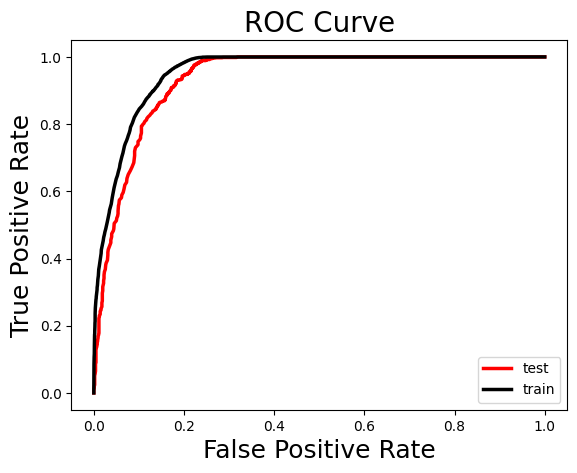

In [21]:
y_pred_test = disc_sup.predict(X_test)
y_pred_train = disc_sup.predict(X_train)

[x1,y1]=ROCcurve(y_test,y_pred_test)
[x2,y2]=ROCcurve(y_train,y_pred_train)

'''
font = {
        'size'   : 15,
        'weight' : 'bold'}
plt.rc('font', **font)
plt.rc('text', usetex=False)
'''

plt.plot(x1, y1 , c = 'r', linewidth = '2.5')
plt.plot(x2, y2 , c = '#000000', linewidth = '2.5')

plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)

plt.legend(['test', 'train'])

plt.show()

## **Validation**

In [ ]:
glioma_vcf = pd.read_excel(os.path.join(root,'glioma/glioma.xlsx'), sheet_name=0, header=0)
glioma_seq = open(os.path.join(root,'glioma/glioma.txt') , 'r').readlines()

Preprocessing data (Glioma)

In [ ]:
glioma_vcf['chr'] = glioma_vcf['chr'].map(lambda x: 'chr'+str(x))
glioma = preprocessing.initial_process(glioma_vcf, glioma_seq)

In [ ]:
test_glioma = glioma.sample(frac=0.2)
train_glioma = glioma.drop(test_glioma.index)
test_glioma = test_glioma.reset_index(drop=True)
train_glioma = train_glioma.reset_index(drop=True)

X_train_unsup_glioma = train_glioma.to_numpy()
X_test_unsup_glioma = test_glioma.to_numpy()

X_train_unsup_glioma = np.asarray(X_train_unsup_glioma).astype('float32')
X_test_unsup_glioma = np.asarray(X_test_unsup_glioma).astype('float32')

Fine-tuning the pre-trained GAN model with the glioma dataset



In [ ]:
disc_sup = SSGAN_model.define_supdisc(disc)

loss_unsup_test = train.train_unsupervised(disc_unsup, gan_model, gen_model, SSGAN_model.generate_fake_samples, SSGAN_model.generate_latent_points,
                                     SSGAN_model.generate_unlabeled_samples, X_train_unsup_glioma, X_test_unsup_glioma, latent_dim, 100, batch_size)

In [ ]:
acc_sup_test = train.train_supervised(disc_sup, SSGAN_model.generate_labeled_samples,
                                      X_train, y_train, X_test, y_test, latent_dim, num_steps, batch_size)

ROC curves for model evaluation after fine-tuning

In [ ]:
y_pred_test = disc_sup.predict(X_test)
y_pred_train = disc_sup.predict(X_train)

[x1,y1]=ROCcurve(y_test,y_pred_test)
[x2,y2]=ROCcurve(y_train,y_pred_train)

'''
font = {
        'size'   : 15,
        'weight' : 'bold'}
plt.rc('font', **font)
plt.rc('text', usetex=False)
'''

plt.plot(x1, y1 , c = 'r', linewidth = '2.5')
plt.plot(x2, y2 , c = '#000000', linewidth = '2.5')

plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)

plt.legend(['test', 'train'])

plt.show()